In [1]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import DBSCAN

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

In [5]:
train = pd.read_csv('ss_train_shock.csv')
train = train.drop(train.columns[-1], axis=1)
train = train.drop(train.columns[0], axis=1)
train = train.drop(train.columns[0], axis=1)
train = train.drop(['SPEND_SS','percent_increase','WEIGHT'], axis=1)
test = pd.read_csv('ss_test_shock.csv')
test = test.drop(test.columns[-1], axis=1)
test = test.drop(test.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)
test = test.drop(['SPEND_SS','percent_increase','WEIGHT'], axis=1)

In [6]:
train = train.dropna()
test = test.dropna()
train = train.iloc[:8000,:]
test = test.iloc[:2000,:]

In [7]:
train

AGE  HEALTH_CHANGE  HBP  DIABETES  CANCER  LUNGS  HEART_ATTACK  STROKE  \
0      68              0    0         0       0      0             0       0   
1      70              1    0         0       0      0             0       0   
2      72              0    0         0       0      0             0       0   
3      74              0    1         0       0      0             1       0   
4      76              0    0         0       0      0             0       0   
...   ...            ...  ...       ...     ...    ...           ...     ...   
7995   70              0    0         0       0      0             0       0   
7996   72              0    0         0       0      0             0       0   
7997   74             -1    0         0       0      0             0       0   
7998   76              0    0         0       0      0             0       0   
7999   78              1    0         0       0      0             0       0   

      PSYCH  ARTHRITIS  OUT_PT  DRUGS  HOME_CARE  SPECIAL_FAC  HOSPITAL  \
0         0          0       0      1          0            0         0   
1         0          0       1      1          0            0         0   
2         0          0       1      1          0            1         1   
3         0          0       1      1          0            1         3   
4         0          0       0      1          1            1         0   
...     ...        ...     ...    ...        ...          ...       ...   
7995      0          0       0      1          0            0         0   
7996      0          0       1      1          0            0         0   
7997      0          0       1      1          0            0         0   
7998      0          0       1      1          0            0         0   
7999      0          0       0      1          0            1         2   

      NURSING_HOME  SHOCK2  
0                0       0  
1                0       1  
2                0       0  
3                0       0  
4                0       0  
...            ...     ...  
7995             0       1  
7996             0       0  
7997             0       0  
7998             0       0  
7999             0       0  

[8000 rows x 17 columns]

In [8]:
test

AGE  HEALTH_CHANGE  HBP  DIABETES  CANCER  LUNGS  HEART_ATTACK  STROKE  \
0      68              0    0         0       0      0             0       0   
1      70              0    0         0       0      0             0       0   
2      72              0    0         0       0      0             0       0   
3      74              0    0         0       0      0             0       0   
4      76              0    0         0       0      0             0       0   
...   ...            ...  ...       ...     ...    ...           ...     ...   
1995   70             -1    0         0       0      0             0       0   
1996   72              1    0         0       0      0             0       0   
1997   74              0    0         0       0      0             0       0   
1998   76             -1    0         0       0      0             0       0   
1999   78              1    0         0       0      0             0       0   

      PSYCH  ARTHRITIS  OUT_PT  DRUGS  HOME_CARE  SPECIAL_FAC  HOSPITAL  \
0         0          0       0      1          0            0         0   
1         0          0       0      1          0            0         0   
2         0          0       0      1          0            0         3   
3         0          0       0      1          0            0         0   
4         0          0       0      1          0            0         1   
...     ...        ...     ...    ...        ...          ...       ...   
1995      0          0       0      1          0            0         0   
1996      0          0       0      1          0            0         0   
1997      0          0       0      1          0            0         0   
1998      0          0       1      1          0            0         0   
1999      0          0       0      1          0            0         0   

      NURSING_HOME  SHOCK2  
0                0       0  
1                0       0  
2                0       0  
3                0       1  
4                0       0  
...            ...     ...  
1995             0       0  
1996             0       0  
1997             0       0  
1998             0       0  
1999             0       0  

[2000 rows x 17 columns]

In [9]:
X_train = train.loc[:, train.columns!='SHOCK2']
X_test = test.loc[:, test.columns!='SHOCK2']
samples = pd.concat([X_train,X_test])
y_train = train['SHOCK2']
y_test = test['SHOCK2']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

X = X_train_norm
X_test_norm = scaler.transform(X_test)

samples_norm = scaler.transform(samples)

(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)


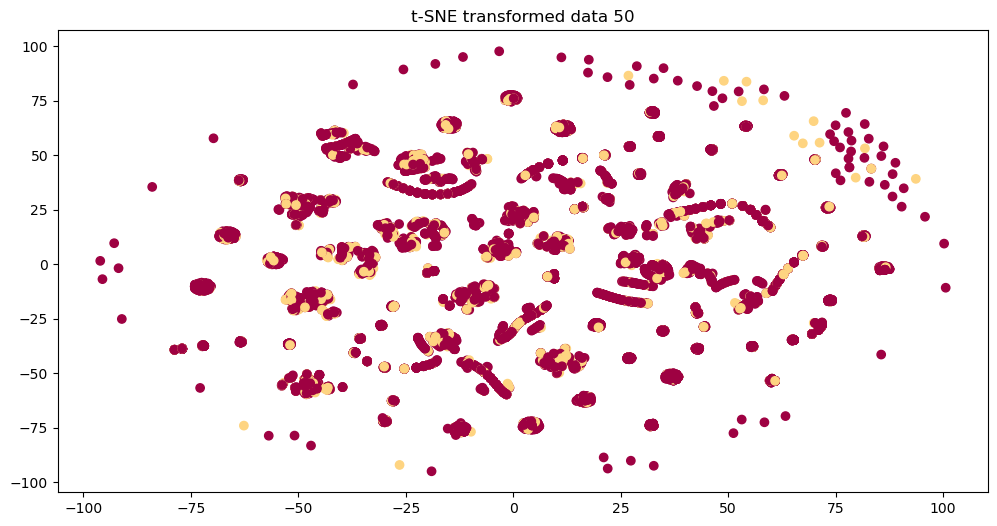

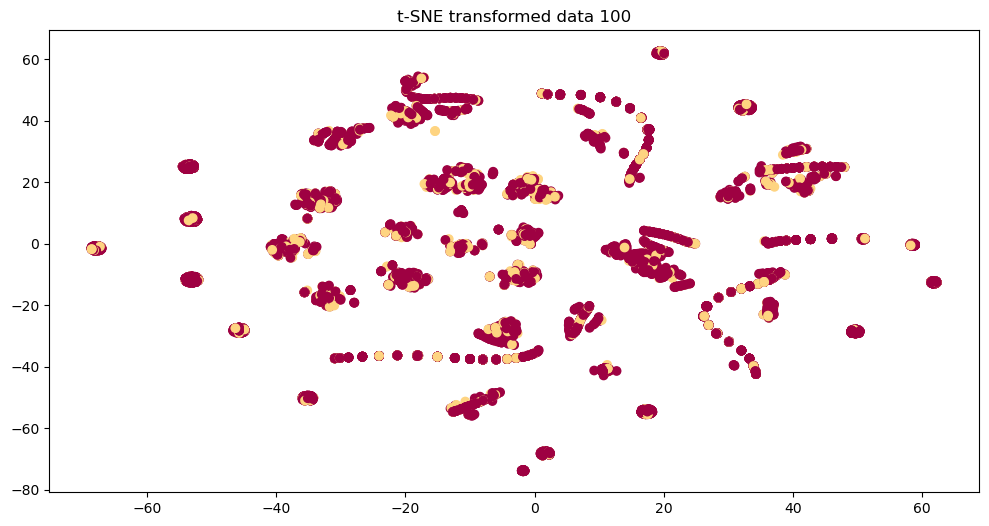

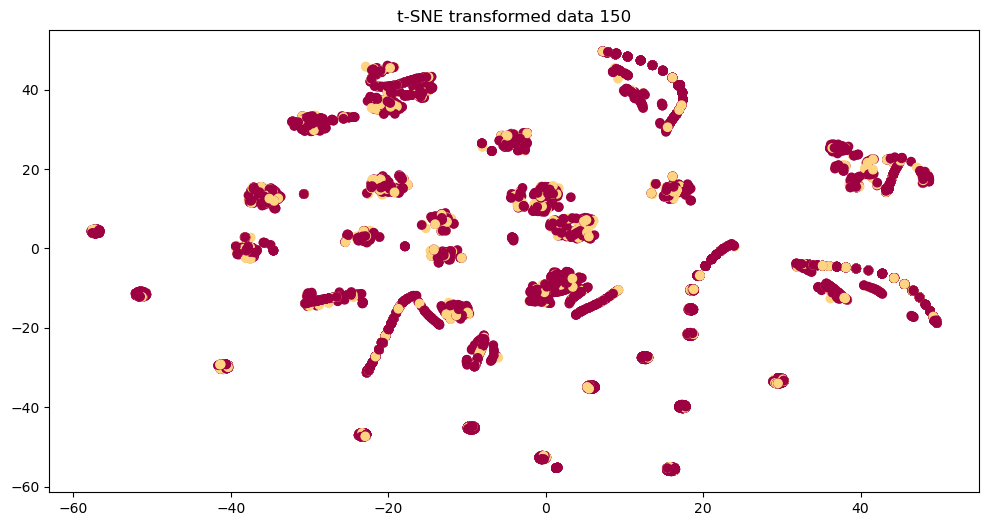

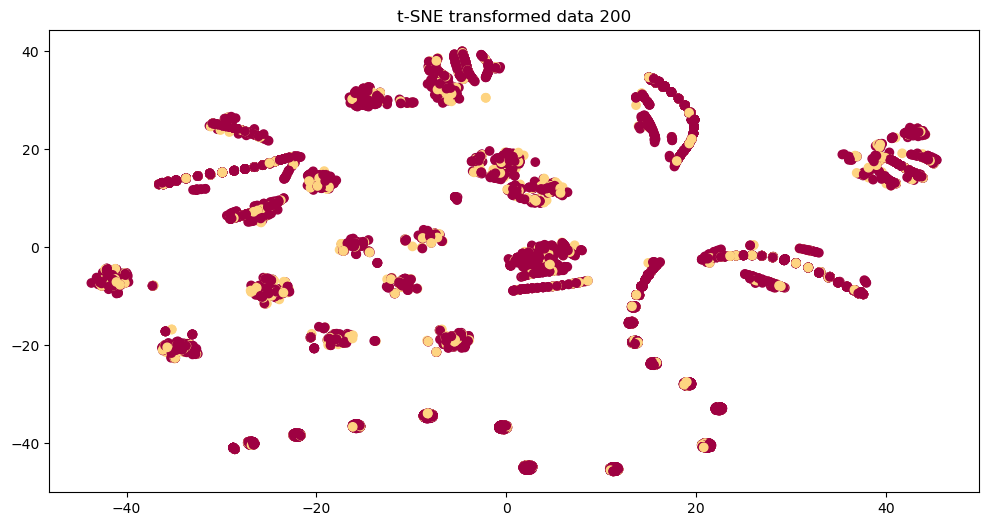

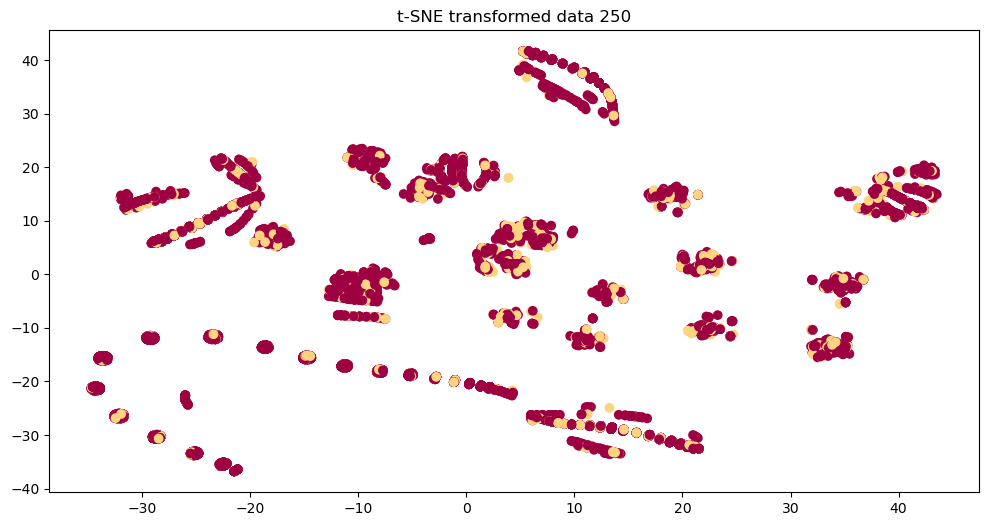

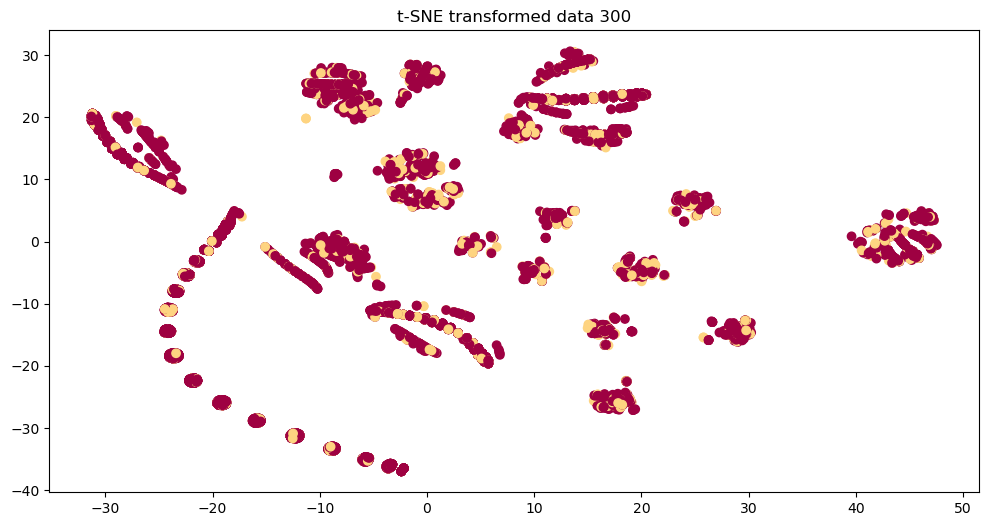

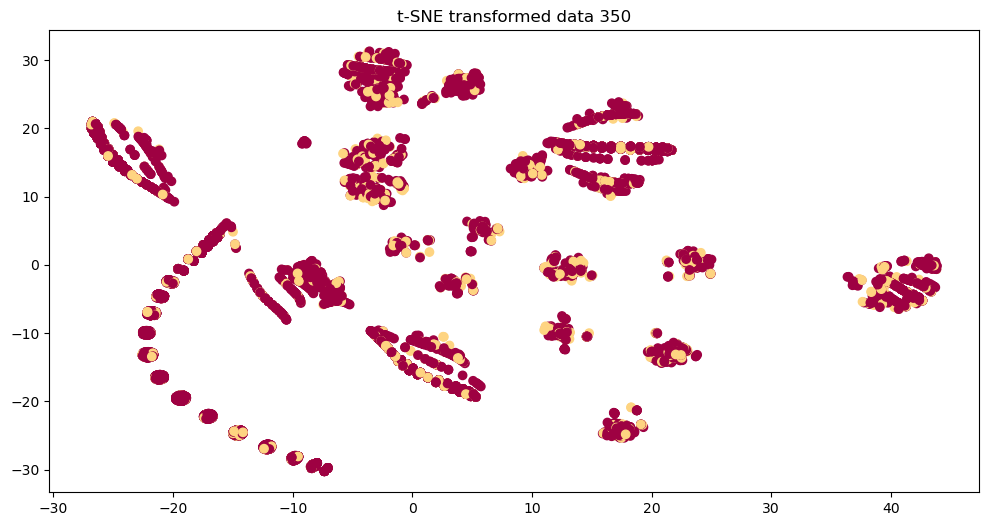

In [11]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_state = 42
prp_var = [50,100,150,200,250,300,350]
for i in prp_var:
    tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=i)
    X_proj = tsne.fit_transform(samples_norm)
    X_test_tsne = X_proj[-2000:]
    X_train_tsne = X_proj[:8000]
    print(X_test_tsne.shape)
    print(X_train_tsne.shape)
    X_proj = X_train_tsne

    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
    plt.title("t-SNE transformed data " + str(i))

(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)


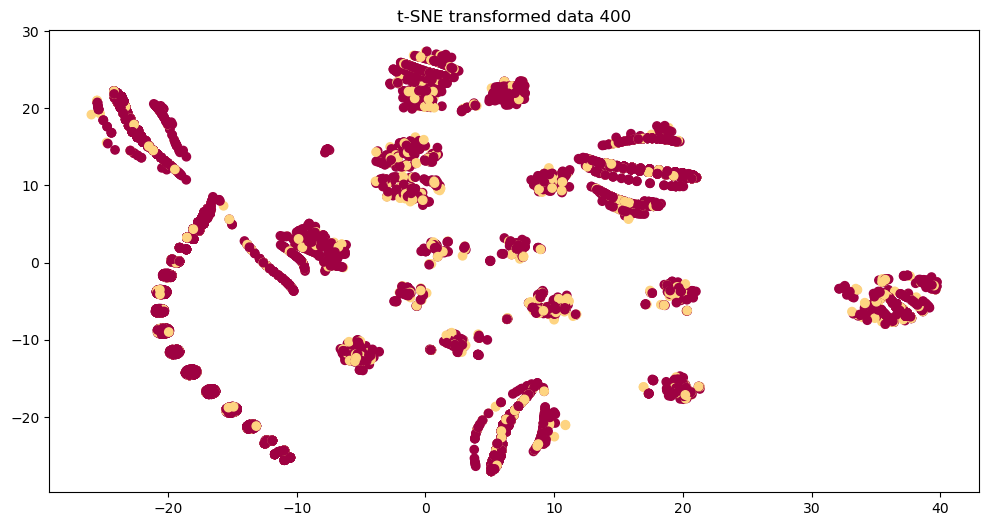

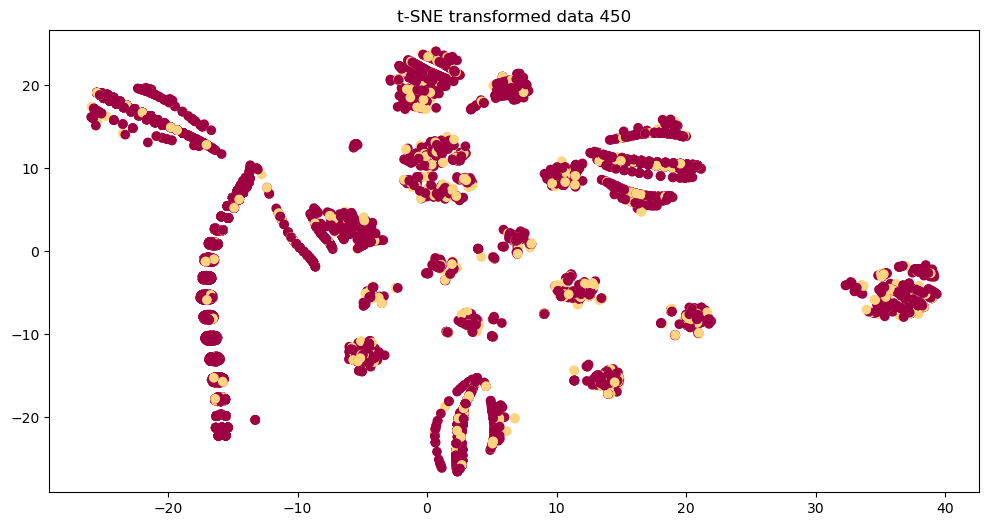

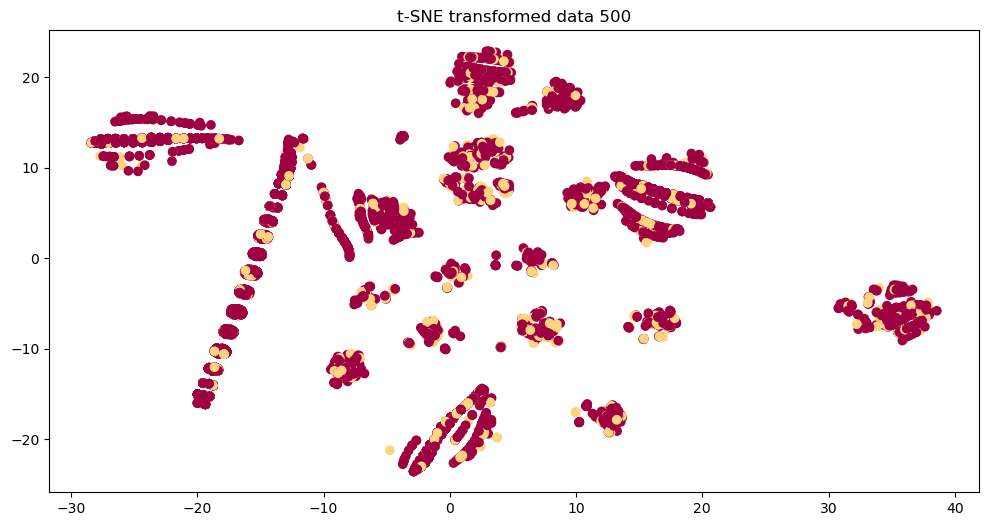

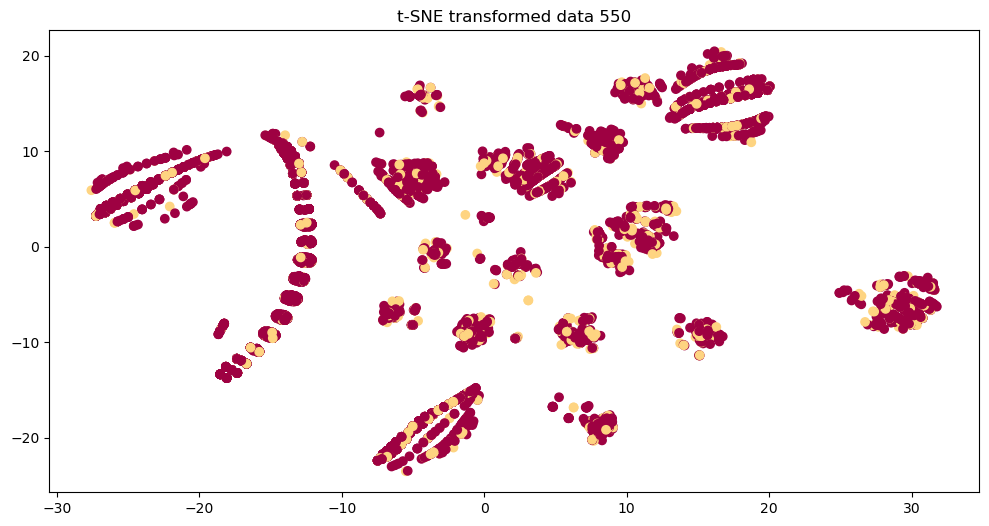

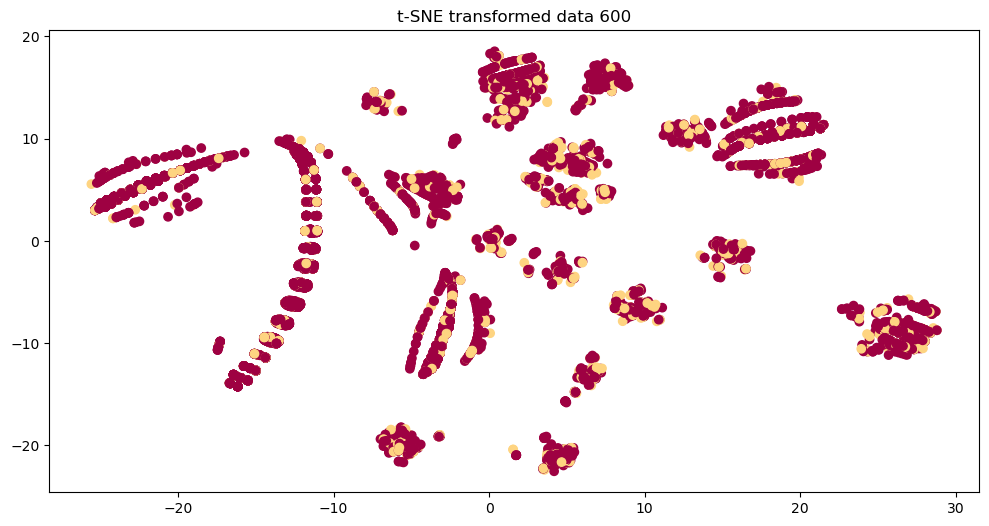

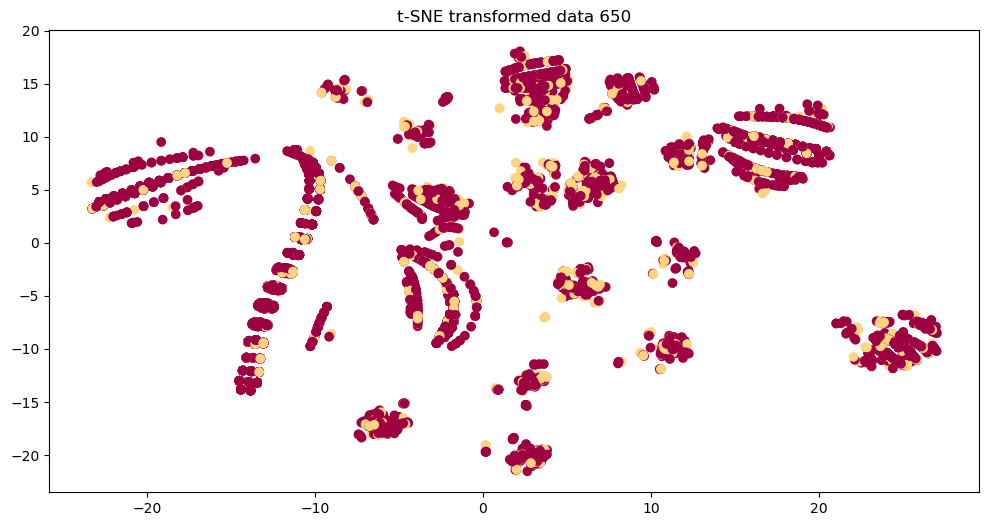

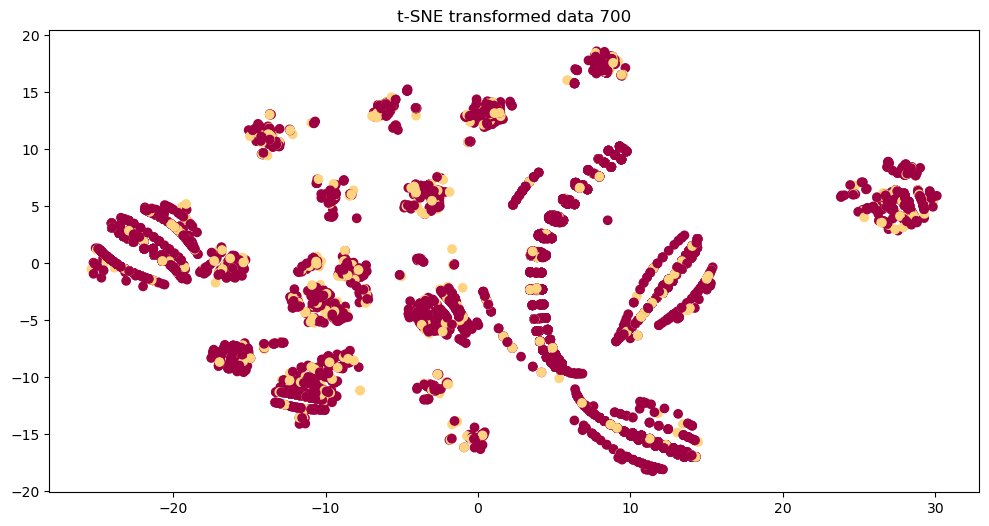

In [12]:
prp_var = [400,450,500,550,600,650,700]
for i in prp_var:
    tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=i)
    X_proj = tsne.fit_transform(samples_norm)
    X_test_tsne = X_proj[-2000:]
    X_train_tsne = X_proj[:8000]
    print(X_test_tsne.shape)
    print(X_train_tsne.shape)
    X_proj = X_train_tsne

    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
    plt.title("t-SNE transformed data " + str(i))

(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)
(2000, 2)
(8000, 2)


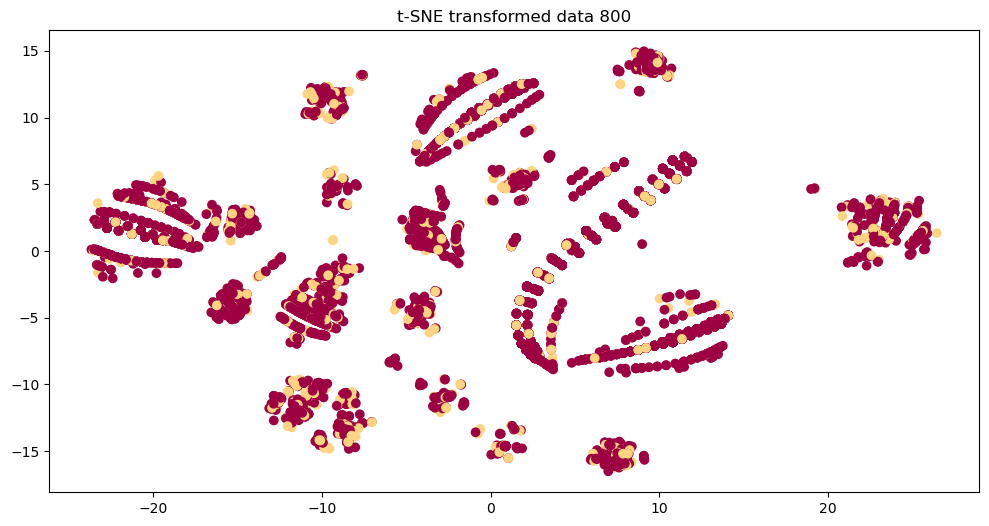

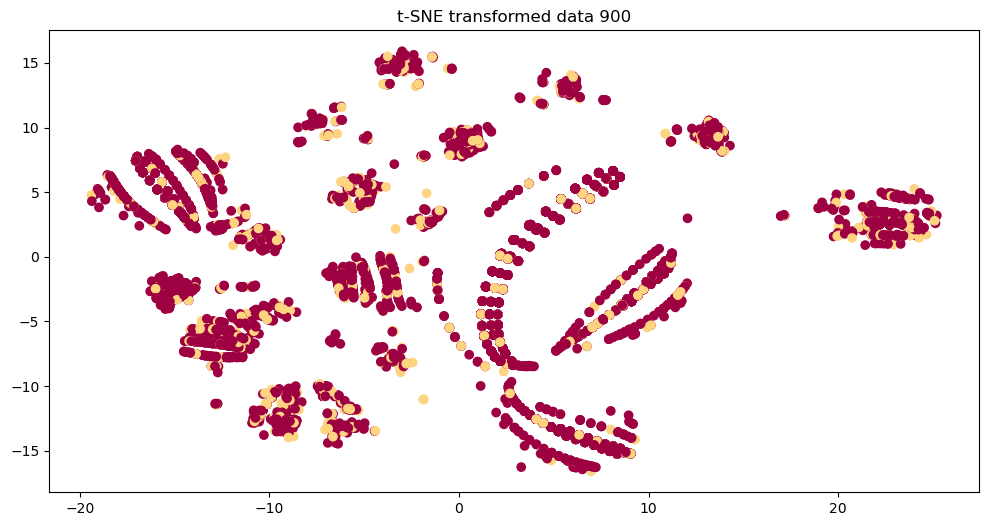

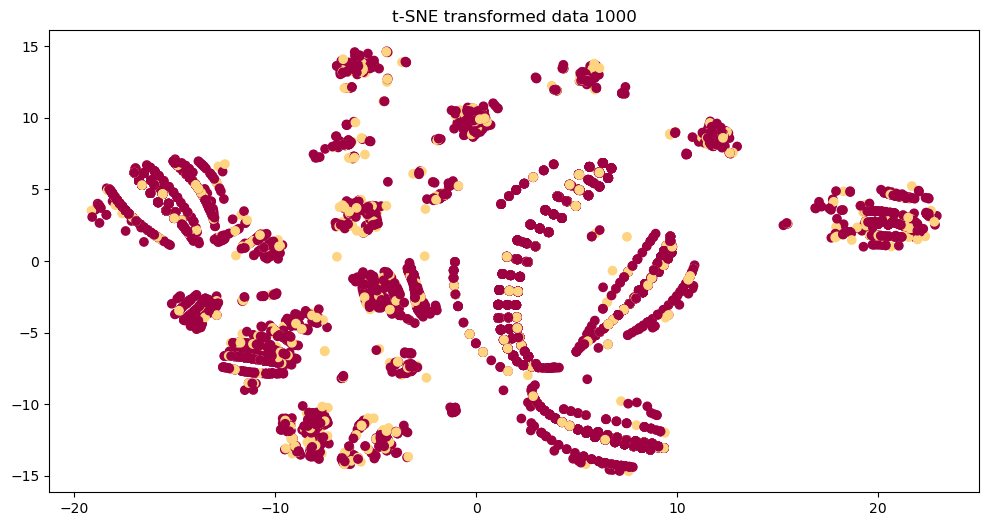

In [14]:
prp_var = [800,900,1000]
for i in prp_var:
    tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=i)
    X_proj = tsne.fit_transform(samples_norm)
    X_test_tsne = X_proj[-2000:]
    X_train_tsne = X_proj[:8000]
    print(X_test_tsne.shape)
    print(X_train_tsne.shape)
    X_proj = X_train_tsne

    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
    plt.title("t-SNE transformed data " + str(i))

(2000, 2)
(8000, 2)


Text(0.5, 1.0, 't-SNE transformed data')

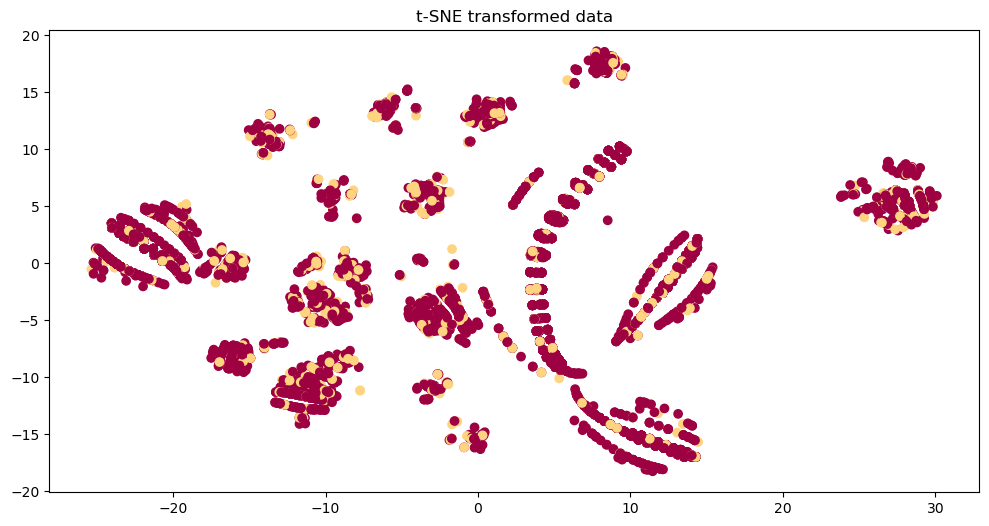

In [15]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_state = 42
prp_var = 700

# # Transform  dimensional data to 2 dimensions
tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=prp_var)
X_proj = tsne.fit_transform(samples_norm)
X_test_tsne = X_proj[-2000:]
X_train_tsne = X_proj[:8000]
print(X_test_tsne.shape)
print(X_train_tsne.shape)
X_proj = X_train_tsne

fig = plt.figure(figsize=(12, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
plt.title("t-SNE transformed data")

Starting plot 2


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 3


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 4


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 5


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 6


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 7


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 8


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 9


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 10


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 11


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 12


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 13


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Starting plot 14


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\767881745.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


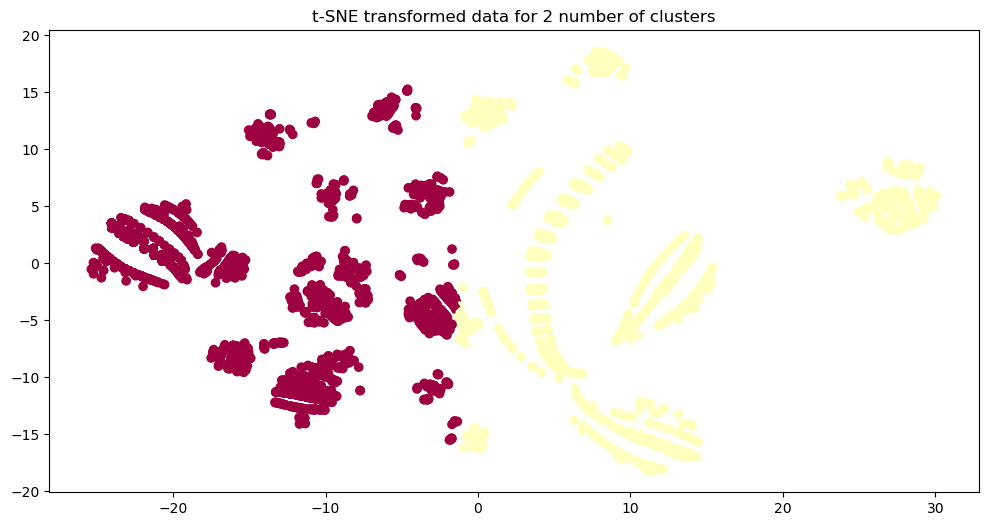

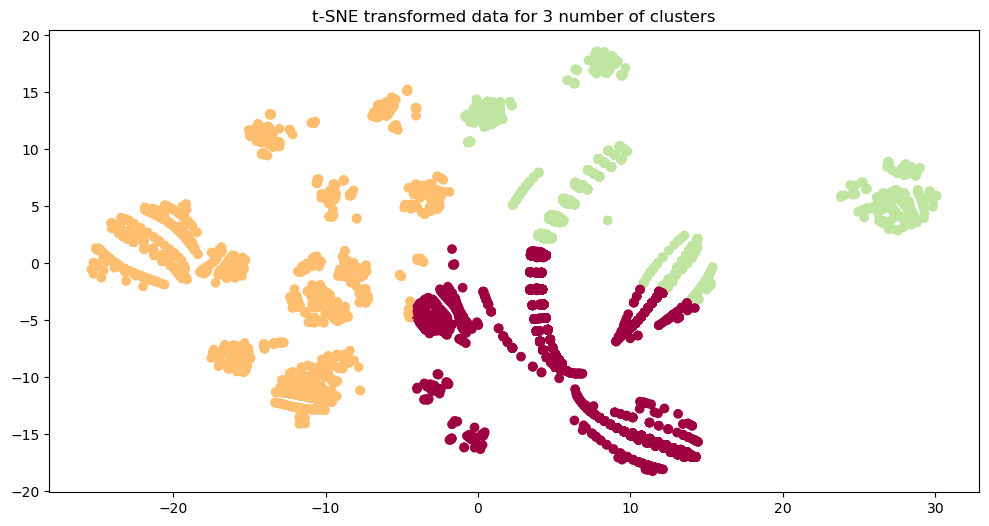

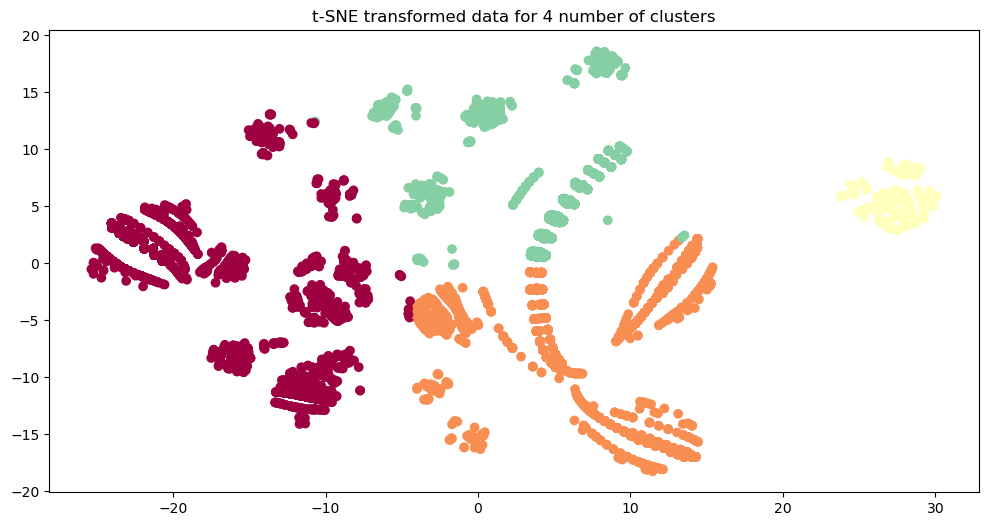

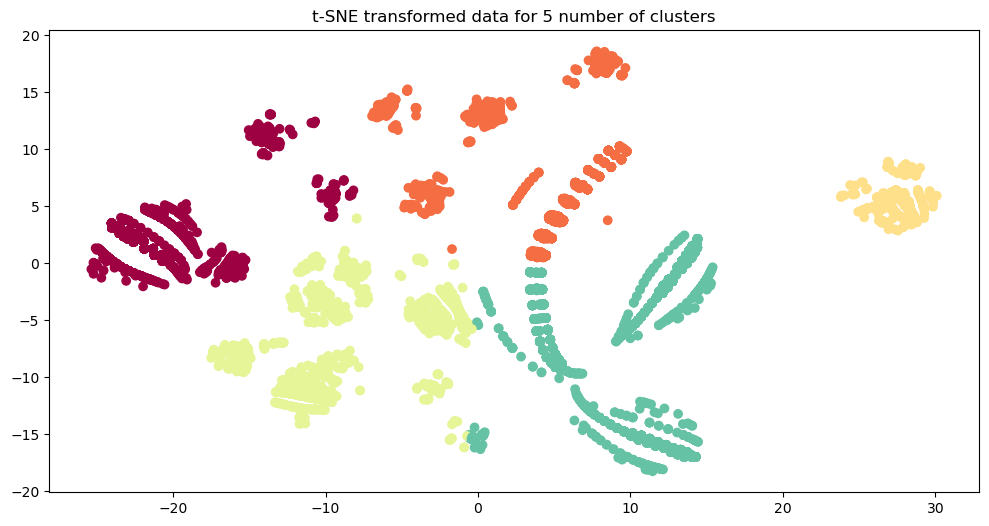

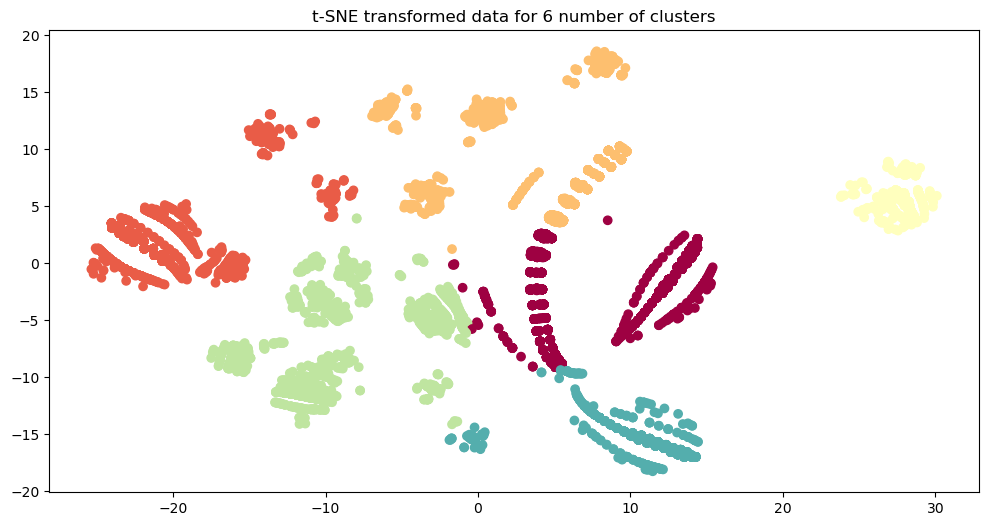

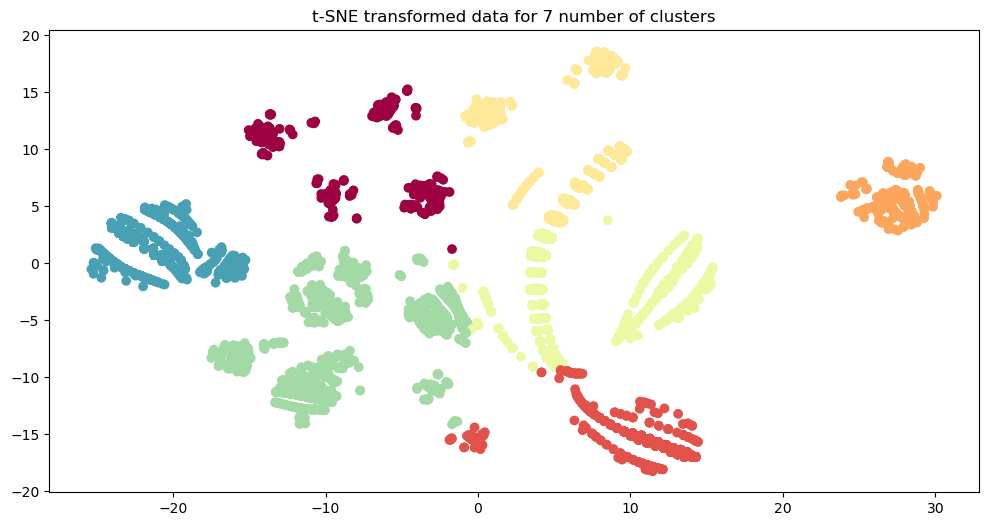

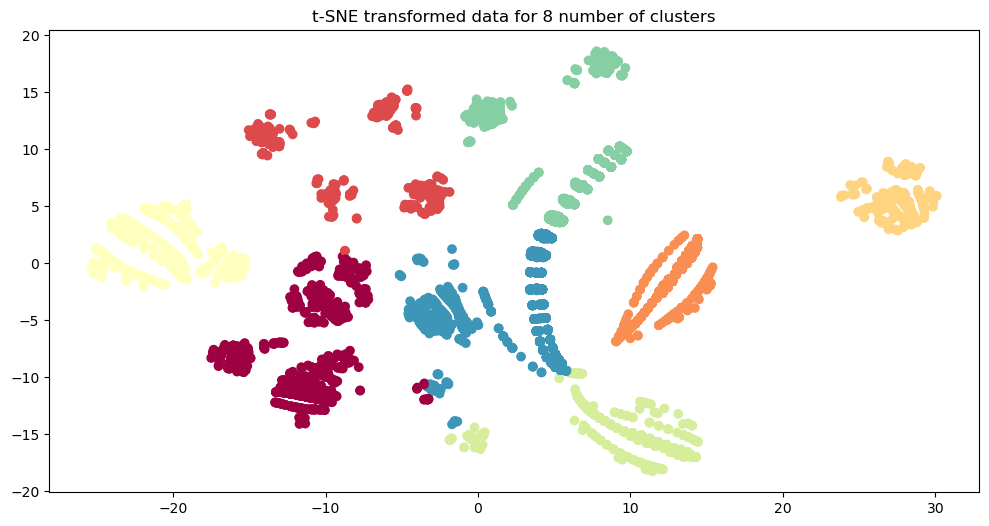

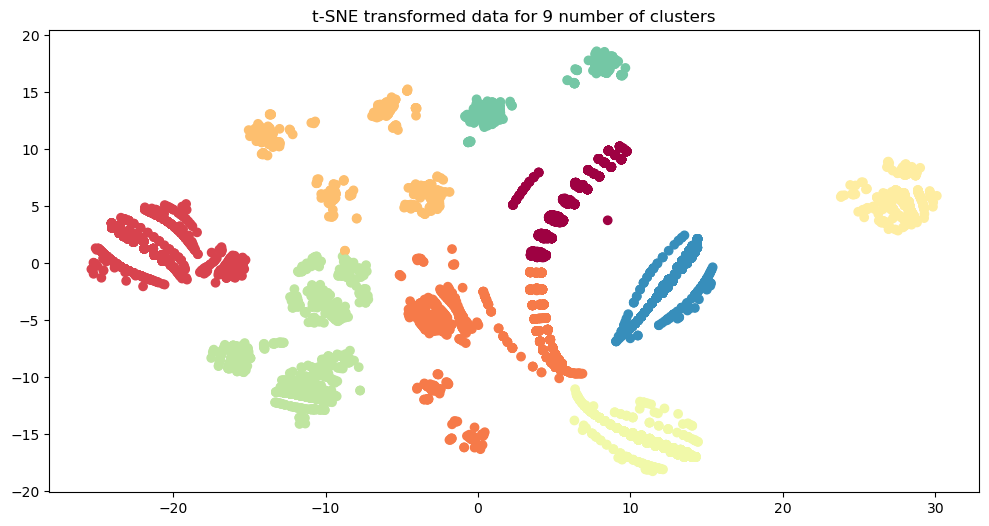

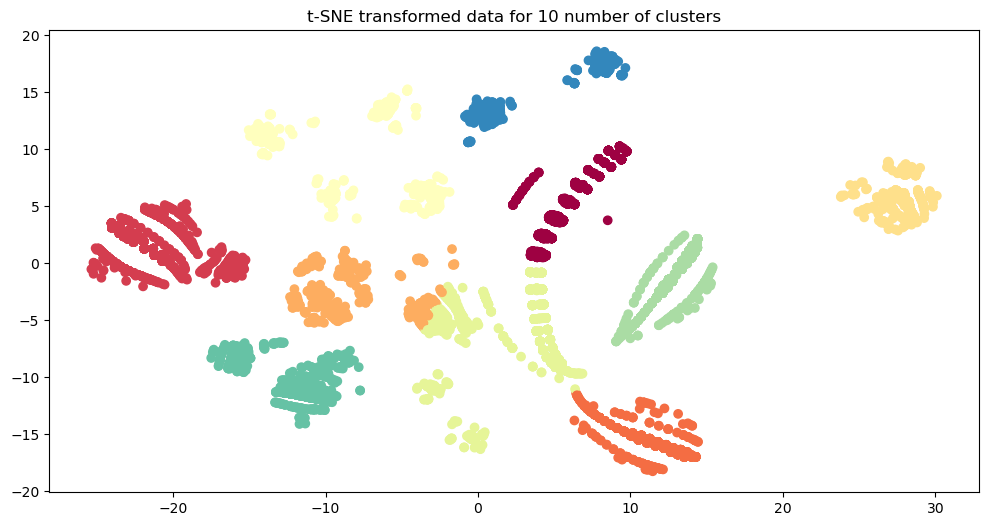

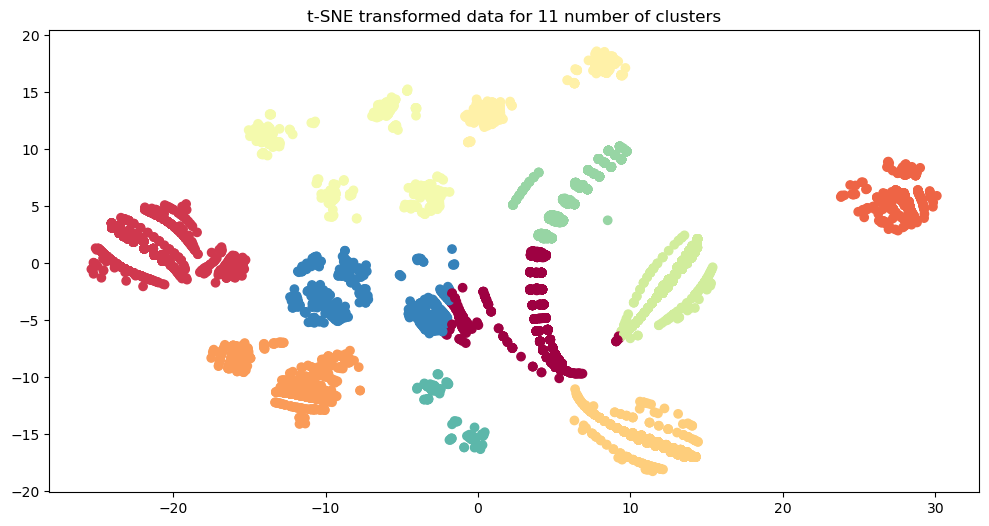

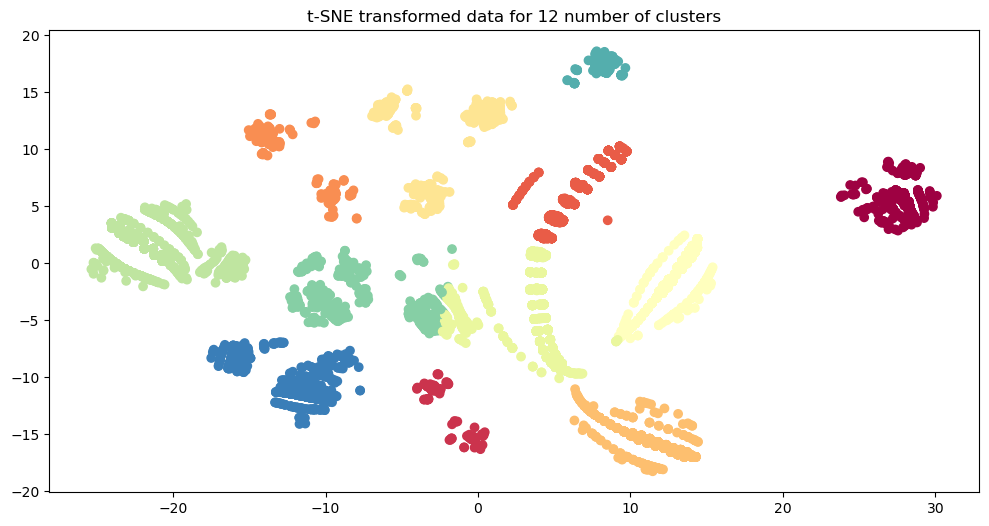

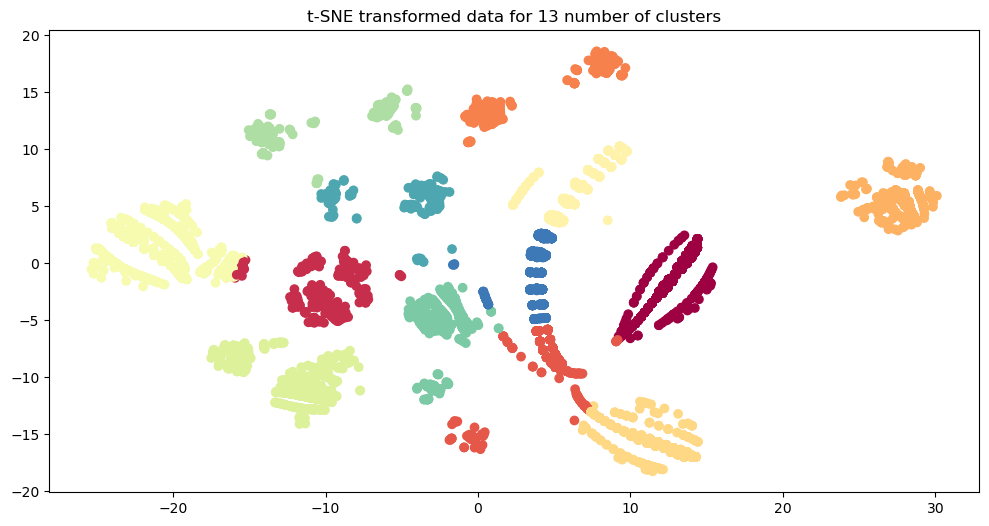

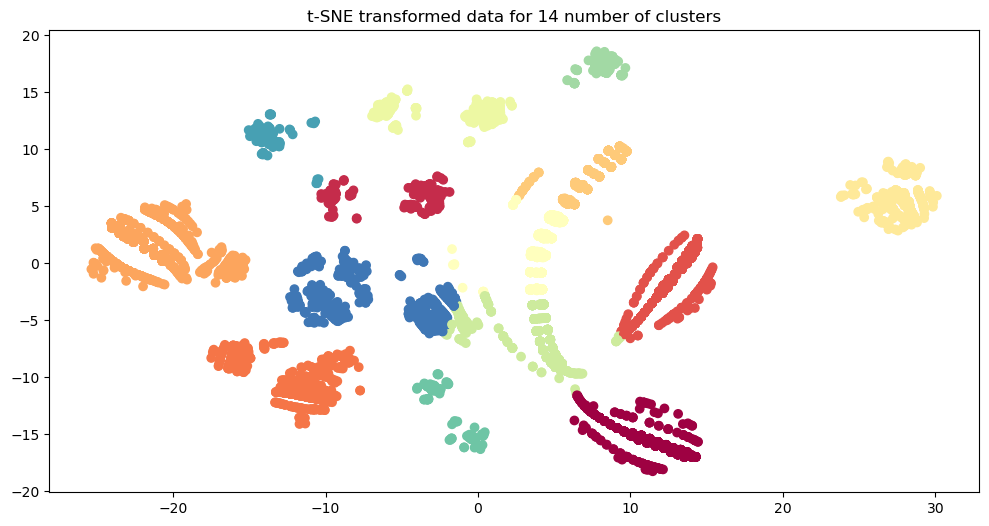

In [16]:
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for num_clusters in range(2,15):
    print("Starting plot {:d}".format(num_clusters))
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(X_proj)
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(y_train[mask])[0]
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_proj[:, 0], X_proj[:, 1], \
            c=[cm.Spectral(float(i) / num_clusters) for i in clusters])
    plt.title("t-SNE transformed data for " + str(num_clusters) + " number of clusters")
    f1_score(y_train, labels,average='micro')

In [17]:
y_train.reset_index(drop=True, inplace=True)

Starting plot 5


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_23960\3023912289.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


array([[-19.236517 ,   3.1219816],
       [  3.6019418,   8.511337 ],
       [ 27.856956 ,   5.785762 ],
       [ -8.939825 ,  -6.615454 ],
       [  8.52391  ,  -7.612419 ]], dtype=float32)

array([[  9.407646  ,   9.078803  ],
       [-21.326296  ,   4.356021  ],
       [-16.143927  ,  -8.864273  ],
       ...,
       [-23.692135  ,  -0.09579156],
       [-21.30989   ,   1.2518353 ],
       [-10.351905  ,  -9.842629  ]], dtype=float32)

[2753, 5095, 137, 7427, 814]

[0 1 2 3 4]
{0: 1368, 1: 1978, 2: 546, 3: 1700, 4: 2408}
{0: 292, 1: 418, 2: 111, 3: 368, 4: 402}
0th cluster is: 
AGE              77
HEALTH_CHANGE     1
HBP               0
DIABETES          0
CANCER            0
LUNGS             0
HEART_ATTACK      0
STROKE            0
PSYCH             0
ARTHRITIS         0
OUT_PT            1
DRUGS             1
HOME_CARE         0
SPECIAL_FAC       0
HOSPITAL          1
NURSING_HOME      0
Name: 2753, dtype: int64
And has a total of 1368 and a 0.213450 percentage to experience liquidity event
-------------------------------------------------
1th cluster is: 
AGE              67
HEALTH_CHANGE     0
HBP               0
DIABETES          0
CANCER            0
LUNGS             0
HEART_ATTACK      0
STROKE            0
PSYCH             0
ARTHRITIS         0
OUT_PT            0
DRUGS             1
HOME_CARE         0
SPECIAL_FAC       0
HOSPITAL          1
NURSING_HOME      0
Name: 5095, dtype: int64
And has a total of 1978 and a 0.211325 percentag

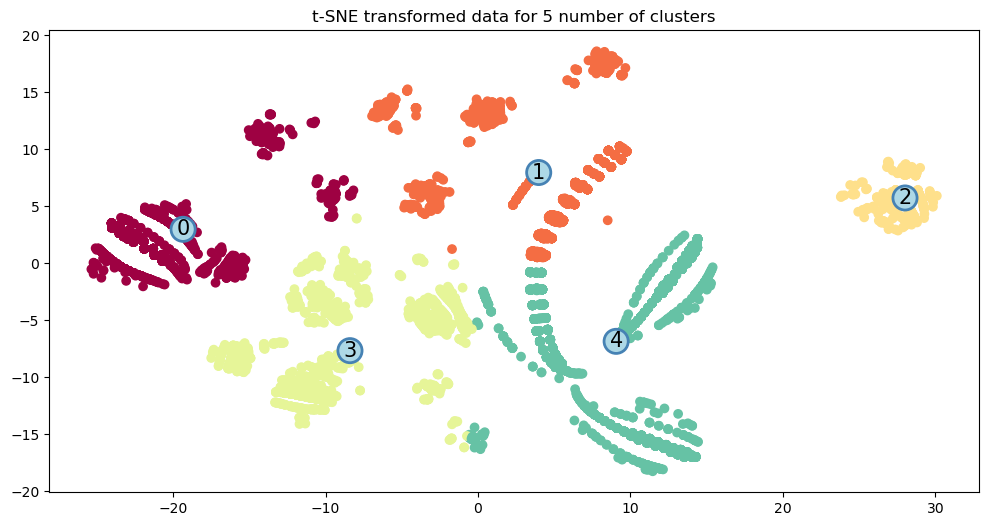

In [18]:
num_clusters = 5
print("Starting plot {:d}".format(num_clusters))


# Compute the clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
clusters = kmeans.fit_predict(X_proj)



# Permute the labels
labels = np.zeros_like(clusters)
for i in range(num_clusters):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]



fig = plt.figure(figsize=(12, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], \
            c=[cm.Spectral(float(i) / num_clusters) for i in clusters])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')




plt.title("t-SNE transformed data for " + str(num_clusters) + " number of clusters")

cluster_cent_indexs = []

for i in range(0,num_clusters):
    min = 0
    for j in range(0,len(X_proj)):
        points = X_proj[j]
        if np.linalg.norm(kmeans.cluster_centers_[i] - points) < np.linalg.norm(kmeans.cluster_centers_[i] - X_proj[min]):
            min = j
    #if (kmeans.cluster_centers_[i] == points).all():
    #  cluster_cent_indexs.append(points)
    cluster_cent_indexs.append(min)

for i in range(0,len(cluster_cent_indexs)):
    loc = X_proj[cluster_cent_indexs[i]]
    plt.text(loc[0], loc[1], str(i), ha="center", va="center", size=15,
            bbox=dict(boxstyle="circle,pad=0.1",
                      fc="lightblue", ec="steelblue", lw=2))


  # Compute the accuracy
f1_score(y_train, labels,average='micro')

display(kmeans.cluster_centers_)
display(X_proj)
display(cluster_cent_indexs)

clu_defect = {i:0 for i in range(0,num_clusters)}
clu_total = {i:0 for i in range(0,num_clusters)}

print(np.unique(clusters))

for i in range(0,len(clusters)):
  #print(clusters[i] - 1)
    if y_train[i]:
        clu_defect[clusters[i]] += 1
    clu_total[clusters[i]] += 1

print(clu_total)
print(clu_defect)

for i in range(0, len(cluster_cent_indexs)):
    print("{:d}th cluster is: ".format(i))
    print(X_train.iloc[cluster_cent_indexs[i]])
    print("And has a total of {:d} and a {:f} percentage to experience liquidity event".format(clu_total[i],clu_defect[i]/clu_total[i]))
    print("-------------------------------------------------")



clu_defect_perc = {i:(clu_defect[i]/clu_total[i]) for i in range(0,num_clusters)}
for i in (sorted(clu_defect_perc.keys(), key=clu_defect_perc.get)):
    print("{:d}: {:f}".format(i, clu_defect_perc[i]))

C:\Users\HP\AppData\Local\Temp\ipykernel_23960\214348704.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


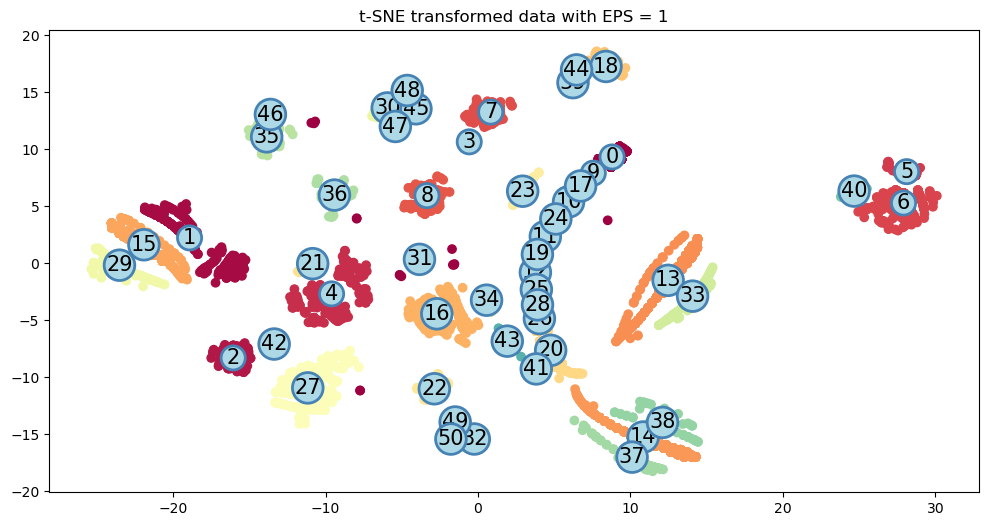

Number of clusters for eps=1: 52
F1 Score for eps=1: 0.8015


C:\Users\HP\AppData\Local\Temp\ipykernel_23960\214348704.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


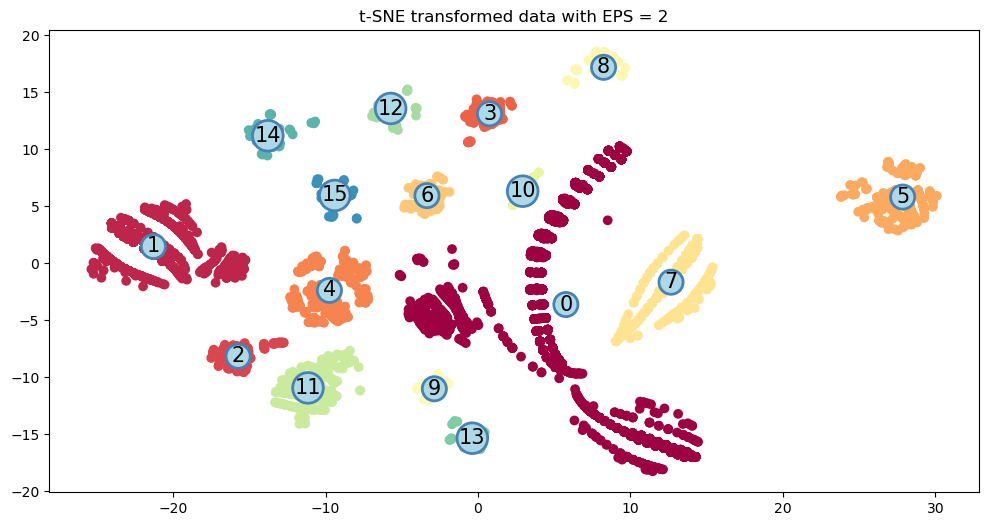

Number of clusters for eps=2: 17
F1 Score for eps=2: 0.801125


C:\Users\HP\AppData\Local\Temp\ipykernel_23960\214348704.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


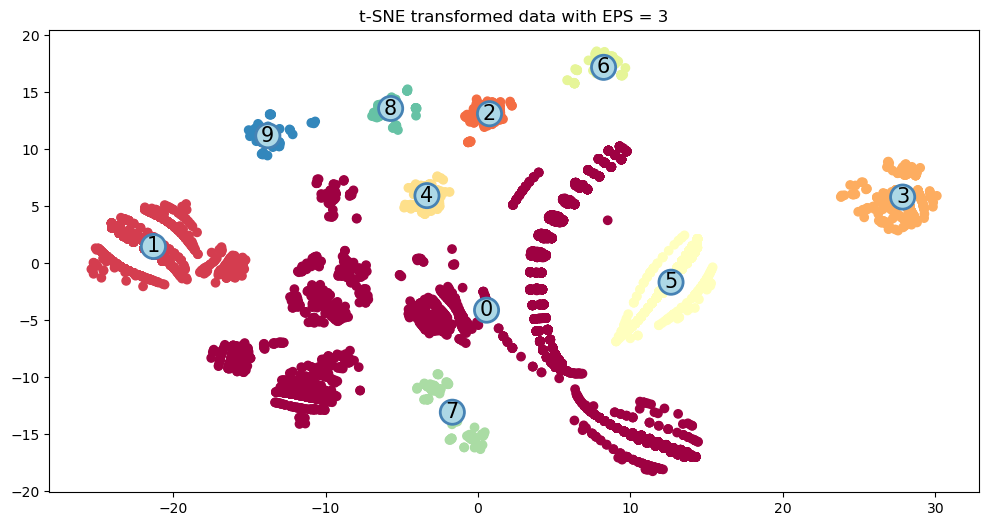

Number of clusters for eps=3: 10
F1 Score for eps=3: 0.801125


C:\Users\HP\AppData\Local\Temp\ipykernel_23960\214348704.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


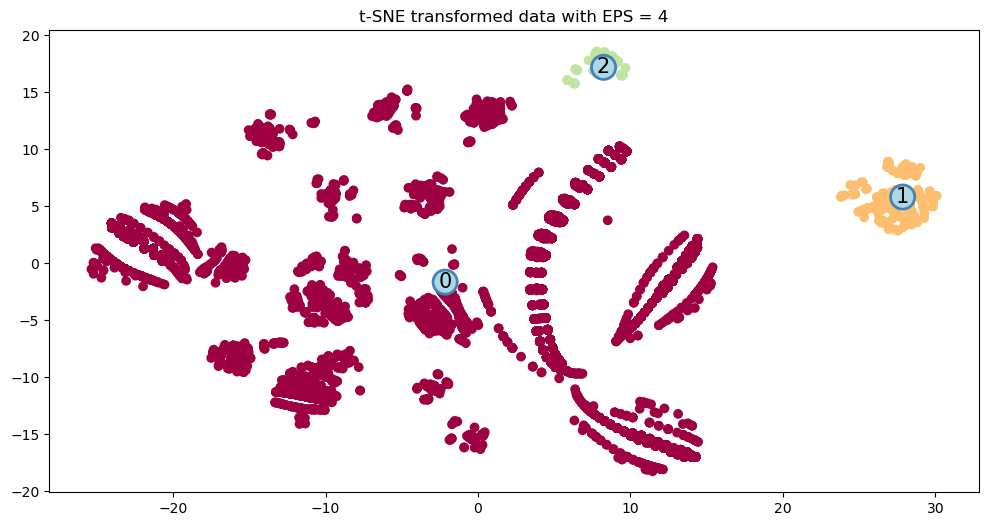

Number of clusters for eps=4: 3
F1 Score for eps=4: 0.801125


C:\Users\HP\AppData\Local\Temp\ipykernel_23960\214348704.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


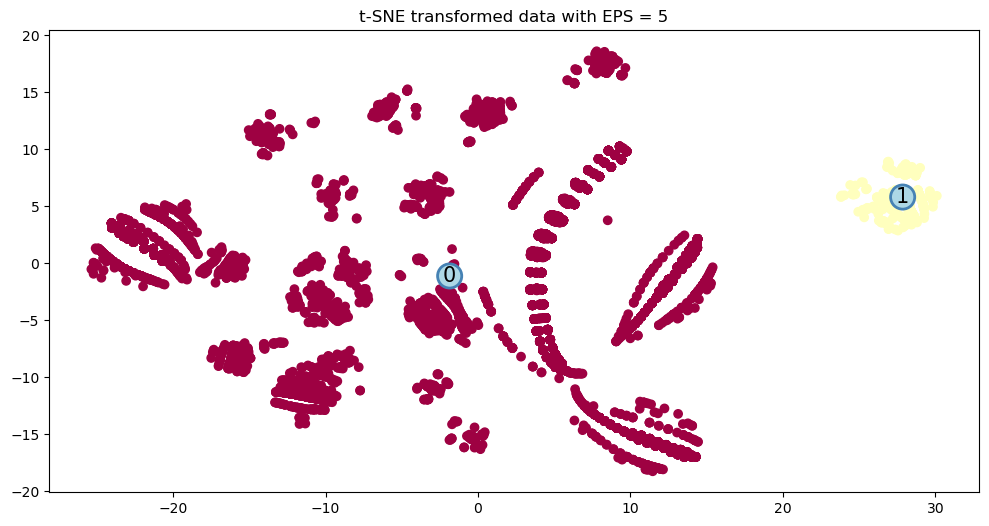

Number of clusters for eps=5: 2
F1 Score for eps=5: 0.801125


C:\Users\HP\AppData\Local\Temp\ipykernel_23960\214348704.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


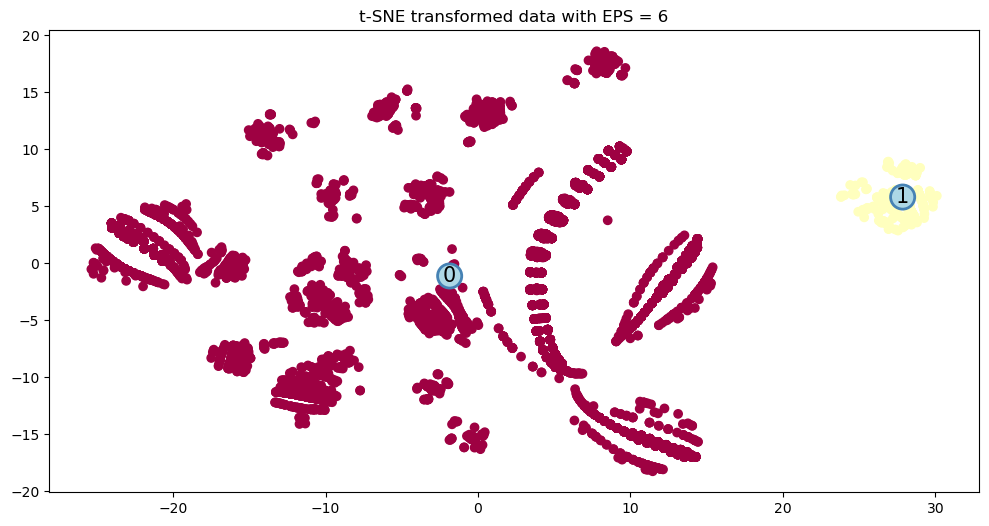

Number of clusters for eps=6: 2
F1 Score for eps=6: 0.801125


In [19]:
eps_values = [1, 2, 3, 4, 5, 6]

for eps in eps_values:
    dbs = DBSCAN(eps=eps)
    clusters = dbs.fit_predict(X_proj)

    # Calculate the unique clusters and their counts
    uq = np.unique(clusters)
    num_clusters = len(uq)

    # Permute the labels based on the mode of the original labels
    labels = np.zeros_like(clusters)
    for i in uq:  # Change range(10) to unique values in clusters to handle varying cluster numbers
        mask = (clusters == i)
        # Only assign a label if there are any points in the cluster
        if np.any(mask):
            labels[mask] = mode(y_train[mask])[0][0]

    # Plotting
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_proj[:, 0], X_proj[:, 1], c=[cm.Spectral(float(i) / num_clusters) for i in clusters])
    plt.title(f"t-SNE transformed data with EPS = {eps}")
    
    # Calculate and annotate cluster centers
    centers = {}
    for i in uq:
        if i != -1:  # Skip noise points
            center = X_proj[clusters == i].mean(axis=0)
            centers[i] = center
            plt.text(center[0], center[1], str(i), ha="center", va="center", size=15,
                     bbox=dict(boxstyle="circle,pad=0.1", fc="lightblue", ec="steelblue", lw=2))
    
    plt.show()  # Show the plot for each value of eps

    # Print the number of clusters
    print(f"Number of clusters for eps={eps}: {num_clusters}")

    # Compute and print the F1 score
    f1 = f1_score(y_train, labels, average='micro')
    print(f"F1 Score for eps={eps}: {f1}")

C:\Users\HP\AppData\Local\Temp\ipykernel_23960\3142324892.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


3


0.801125

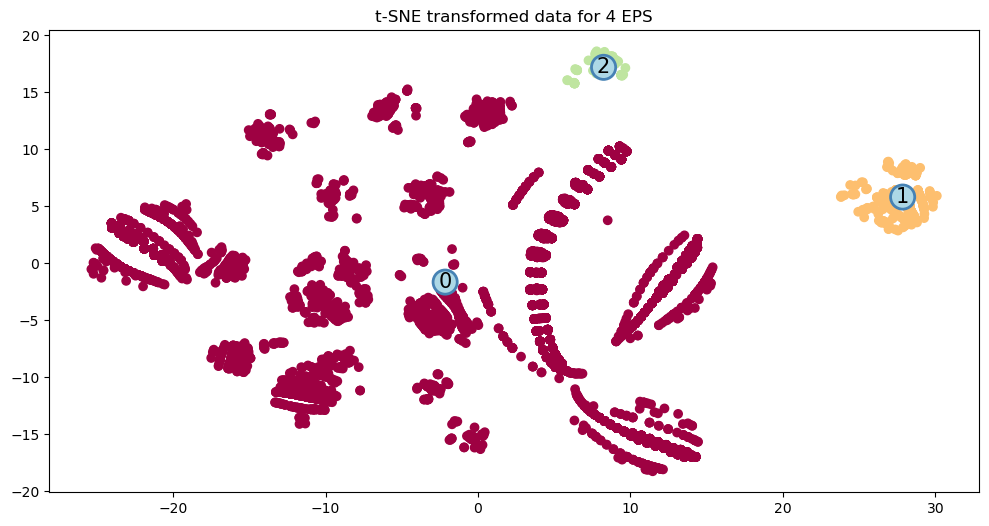

In [20]:
eps = 4

dbs = DBSCAN(eps = eps)

#X_proj = TSNE_DONE[perp][:8000]
clusters = dbs.fit_predict(X_proj)

uq = np.unique(clusters)
num_clusters = len(uq)



#plt.scatter(kmeans.cluster_centers_[:, 0], sc.cluster_centers_[:, 1], s=300, c='black')


# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]



fig = plt.figure(figsize=(12, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], \
          c=[cm.Spectral(float(i) / num_clusters) for i in clusters])
plt.title("t-SNE transformed data for " + str(eps) + " EPS")
centers = {}
counts = {}
for i in uq:
    count = 0
    center = np.zeros(2)
    for c in range(0, len(clusters)):
        if (clusters[c] != i):
            continue
        count = count + 1
        center = center + X_proj[c]
    if (count > 0):
        counts[i] = count
        centers[i] = center / count

print(num_clusters)

for i in centers.keys():
    if i > 25:
        break
    loc = centers[i]
    plt.text(loc[0], loc[1], str(i), ha="center", va="center", size=15,
            bbox=dict(boxstyle="circle,pad=0.1",
                      fc="lightblue", ec="steelblue", lw=2))
  #plt.show()
# Compute the accuracy
f1_score(y_train, labels, average='micro')

In [22]:
unique_clusters = np.unique(clusters)


clu_defect = {i: 0 for i in unique_clusters}
clu_total = {i: 0 for i in unique_clusters}


for i, cluster_id in enumerate(clusters):
    if y_train[i]:  
        clu_defect[cluster_id] += 1
    clu_total[cluster_id] += 1

print(clu_total)
print(clu_defect)

# Calculate and print defect percentage for each actual cluster (excluding noise)
for i in unique_clusters:
    if i != -1:  # Skip noise
        total = clu_total[i]
        defect = clu_defect[i]
        defect_percentage = defect / total if total > 0 else 0 
        print(f"{i}th cluster has a total of {total} and a {defect_percentage:.2%} percentage to experience liquidity event")


clu_defect_perc = {i: (clu_defect[i] / clu_total[i] if clu_total[i] > 0 else 0) for i in unique_clusters if i != -1}
for i in sorted(clu_defect_perc.keys(), key=clu_defect_perc.get):
    print(f"{i}: {clu_defect_perc[i]:.2%}")

{0: 7242, 1: 546, 2: 212}
{0: 1422, 1: 111, 2: 58}
0th cluster has a total of 7242 and a 19.64% percentage to experience liquidity event
1th cluster has a total of 546 and a 20.33% percentage to experience liquidity event
2th cluster has a total of 212 and a 27.36% percentage to experience liquidity event
0: 19.64%
1: 20.33%
2: 27.36%
